In [2]:
!pip install pyathena

!pip install pyarrow
!pip install s3fs

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 17.7 MB 10.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
import pyarrow.parquet as pq
import s3fs
fs = s3fs.S3FileSystem()

In [97]:
dataset = pq.ParquetDataset('s3://datalake-published-data-907317471167-us-east-1-dj2y7u4/cmaps-ml', filesystem=fs)
table = dataset.read()
df = table.to_pandas()
df = df.sort_values(['unit_number', 'cycle'])

In [98]:
df.head()

,k_fold_group,col13,op_2,col22,col7,col16,col10,col19,col24,col9,...,.unit_number,col11,op_3,col5,unit_number,col25,year,month,day,hour
9446,1,9046.19,-0.0004,2388,1589.70,521.66,21.61,8.4195,39.06,14.62,...,1,554.36,100.0,518.67,1,23.4190,2020,11,20,19
9447,1,9044.07,-0.0003,2388,1591.82,522.28,21.61,8.4318,39.00,14.62,...,1,553.75,100.0,518.67,1,23.4236,2020,11,20,19
9448,1,9052.94,0.0003,2388,1587.99,522.42,21.61,8.4178,38.95,14.62,...,1,554.26,100.0,518.67,1,23.3442,2020,11,20,19
9449,1,9049.48,0.0000,2388,1582.79,522.86,21.61,8.3682,38.88,14.62,...,1,554.45,100.0,518.67,1,23.3739,2020,11,20,19
9450,1,9055.15,-0.0002,2388,1582.85,522.19,21.61,8.4294,38.90,14.62,...,1,554.00,100.0,518.67,1,23.4044,2020,11,20,19


In [6]:
df.shape

(20631, 33)

In [7]:
import seaborn as sns

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
k_fold_group,20631.0,1.994911,1.407488e+00,0.0000,1.0000,2.0000,3.0000,4.0000
col13,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
op_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0006
col22,20631.0,2388.000000,0.000000e+00,2388.0000,2388.0000,2388.0000,2388.0000,2388.0000
col7,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
col16,20631.0,521.413470,7.375534e-01,518.6900,520.9600,521.4800,521.9500,523.3800
col10,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
col19,20631.0,8.442146,3.750504e-02,8.3249,8.4149,8.4389,8.4656,8.5848
col24,20631.0,38.816271,1.807464e-01,38.1400,38.7000,38.8300,38.9500,39.4300
col9,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


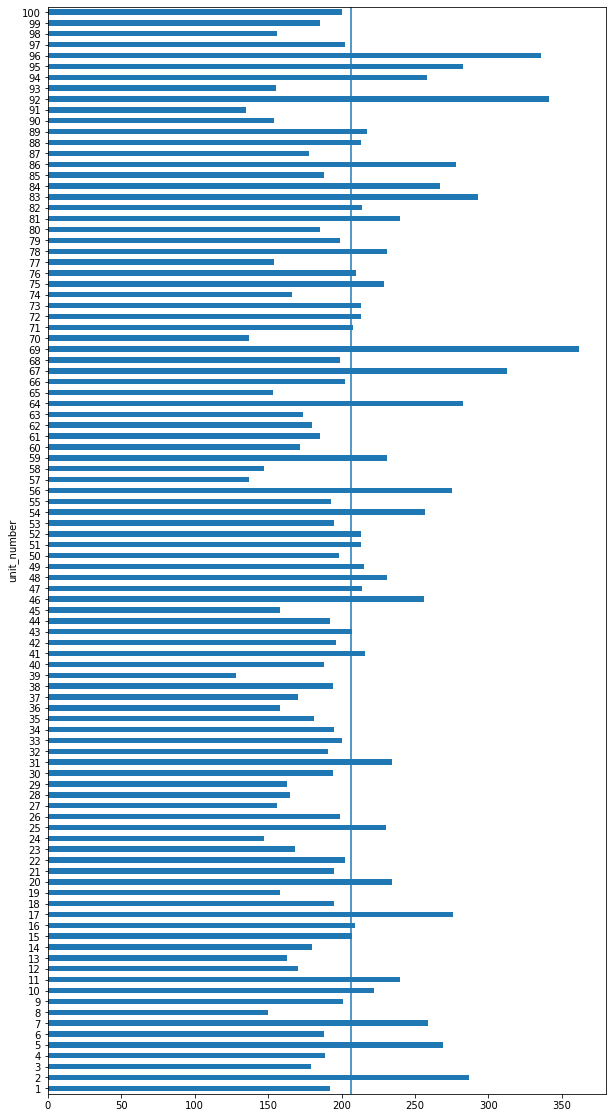

In [162]:
fig, ax = plt.subplots(figsize=(10, 20))
_ = df.groupby('unit_number').cycle.max().plot.barh(ax=ax)
_ = plt.axvline(x=df.groupby('unit_number').cycle.max().mean())

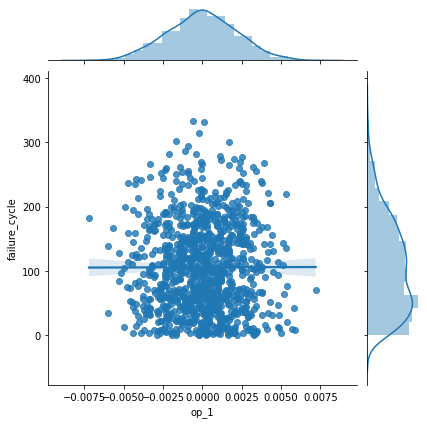

In [9]:
sns.jointplot(x='op_1', y='failure_cycle', data=df.sample(1000), kind='reg')

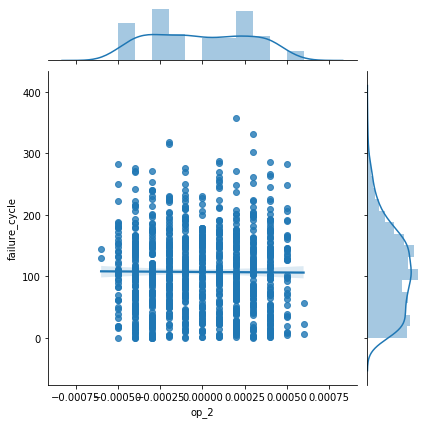

In [20]:
sns.jointplot(x='op_2', y='failure_cycle', data=df.sample(1000), kind='reg')

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


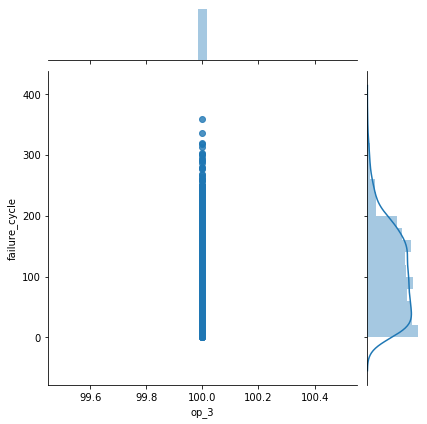

In [21]:
sns.jointplot(x='op_3', y='failure_cycle', data=df.sample(1000), kind='reg')

In [14]:
import matplotlib.pyplot as plt

In [54]:
ddf = df.set_index(['unit_number', 'cycle']).sort_index()

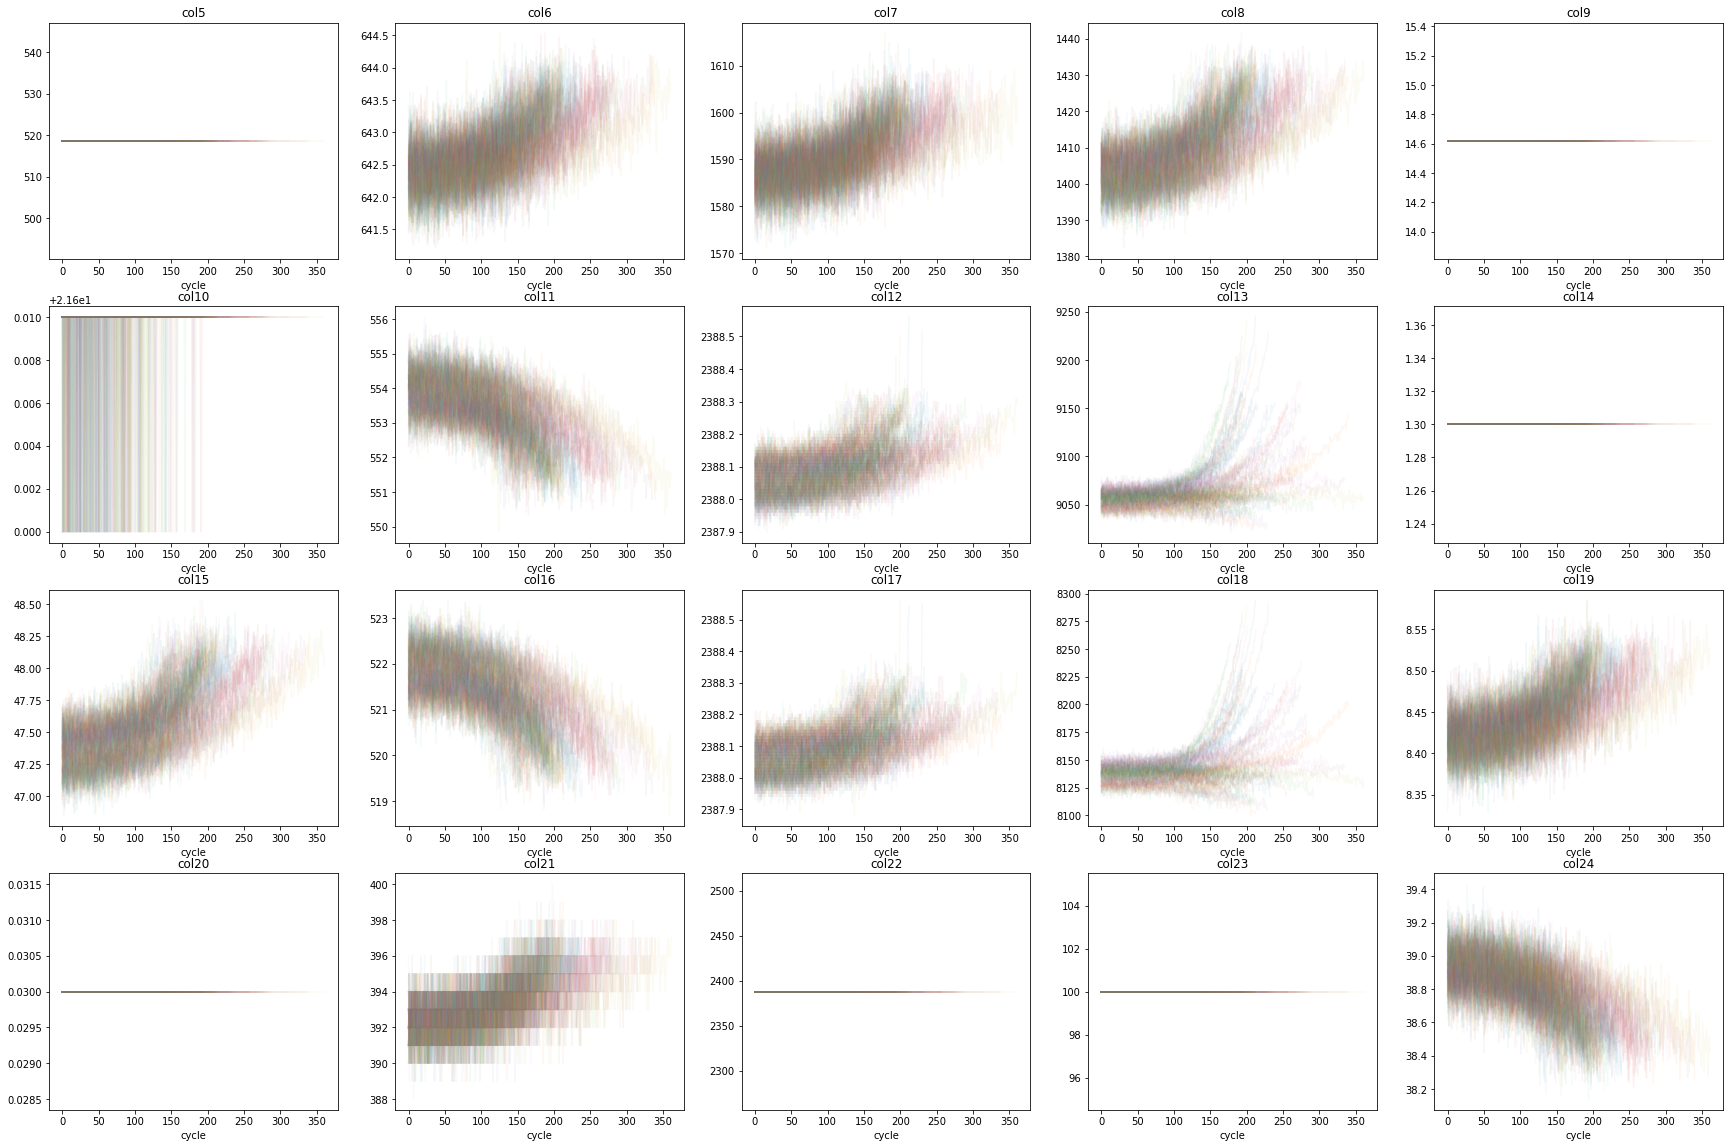

In [56]:
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
axes = axes.ravel()
for i, a in zip(range(5, 25), axes):
    ddd = df.loc[df.unit_number == 60]
    column = 'col' + str(i)
    _ = a.plot(ddf[column].unstack(level=0).values, alpha=.05)
    a.set_title(column)
    a.set_xlabel('cycle')

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
from sklearn.model_selection import train_test_split

In [183]:
features = ['col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20',
 'col21',
 'col22',
 'col23',
 'col24',
 'col25',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'cycle',
 'op_1',
 'op_2',
 'op_3']

In [115]:
import numpy as np

In [171]:
cut_off = 0

In [172]:
x_train, x_test = df.loc[df.k_fold_group != 4, features], df.loc[(df.k_fold_group == 4) & (df.cycle > cut_off), features]

In [173]:
y_train, y_test = df.loc[df.k_fold_group != 4, 'failure_cycle'],  df.loc[(df.k_fold_group == 4) & (df.cycle > cut_off), 'failure_cycle']

In [146]:
cls = RandomForestRegressor(n_jobs=-1, n_estimators=40, )

In [147]:
cls = cls.fit(x_train, y_train)

In [153]:
cls.score(x_test, y_test)

0.5662029087430642

In [145]:
from sklearn.metrics import mean_squared_error

In [154]:
mean_squared_error(y_test, cls.predict(x_test), squared=False)

40.60112598507426

<BarContainer object of 25 artists>

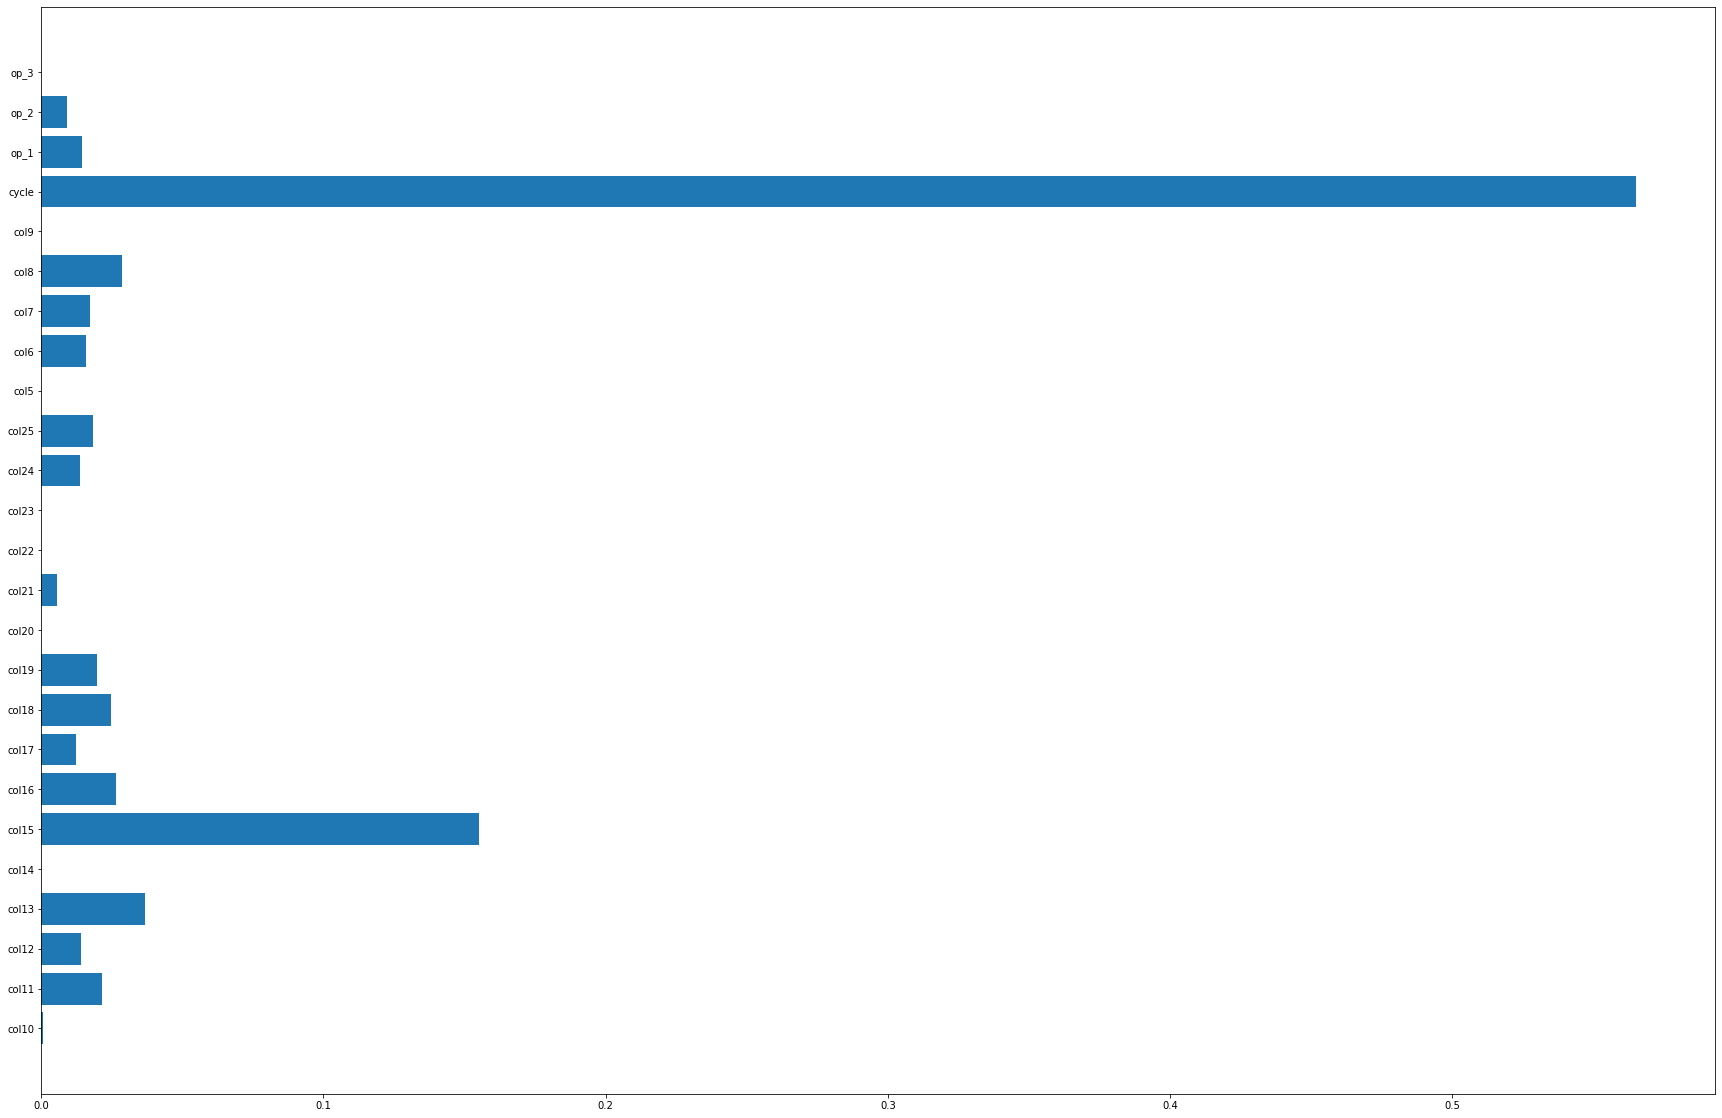

In [103]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.barh(features, cls.feature_importances_)

In [73]:
from sklearn.dummy import DummyRegressor

In [74]:
dummy = DummyRegressor()
dummy = dummy.fit(x_train, y_train)
mean_squared_error(y_test, dummy.predict(x_test), squared=False)

72.87265158859965

Residuals

In [179]:
import pandas as pd

In [200]:
idx = pd.MultiIndex.from_arrays(((x_test.cycle - 1 != x_test.cycle.shift(1)).cumsum()*5, x_test.cycle), names=['unit_number', 'cycle'])
resid = pd.Series(cls.predict(x_test) - y_test.values, idx)

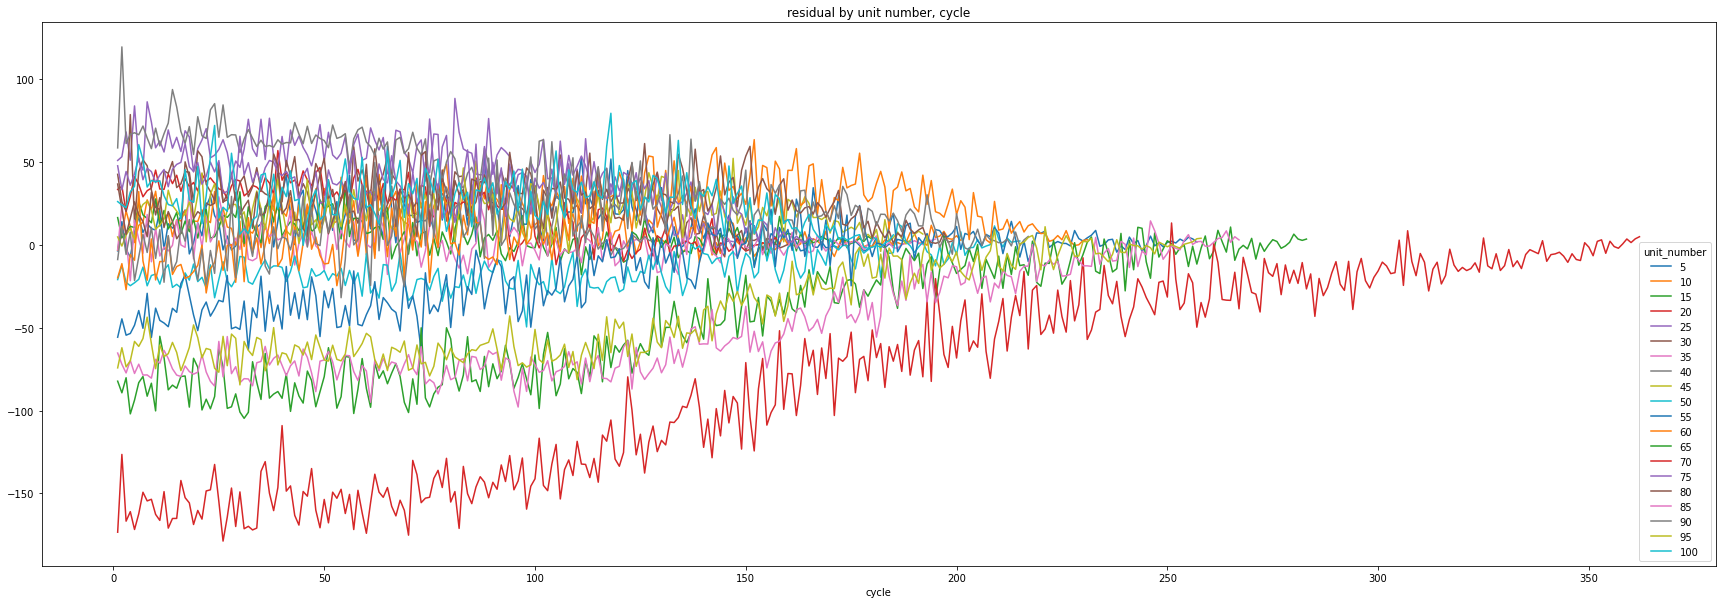

In [207]:
fig, ax = plt.subplots(figsize=(30, 10))
resid.unstack('unit_number').plot(ax=ax)
_ = ax.set_title('residual by unit number, cycle')

In [ ]:
res